
# 畫出投票分類器(VotingClassifier)的決策邊界


本實例在對鳶尾花資料集中的兩個特徵值畫出 :class:`~ensemble.VotingClassifier` 的決策邊界

繪製鳶尾花資料集中的第一個樣本的類別概率，該樣本資料由三個不同的分類器預測並由:class:`~ensemble.VotingClassifier`投出分類。

首先，初始化三個示例性分類器
(:class:`~tree.DecisionTreeClassifier`, :class:`~neighbors.KNeighborsClassifier`, and :class:`~svm.SVC`) 用來起始一個軟性投票 :class:`~ensemble.VotingClassifier` 權重為 `[2,1, 2]`, 這是說在計算平均機率時，所預測機率中:class:`~tree.DecisionTreeClassifier` 與 :class:`~svm.SVC` 都會算成兩倍於 :class:`~neighbors.KNeighborsClassifier`分類器.


In [1]:
#導入需要用到的套件 
%matplotlib inline
print(__doc__)

from itertools import product  #多model 時提高效率

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

Automatically created module for IPython interactive environment


In [2]:
# 載入鳶尾花資料集，並只取前兩個特徵值
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

In [3]:
# 訓練4個分類器
clf1 = DecisionTreeClassifier(max_depth=4)  #越深效果越好
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=4)),
                             ('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('svc', SVC(gamma=0.1, probability=True))],
                 voting='soft', weights=[2, 1, 2])

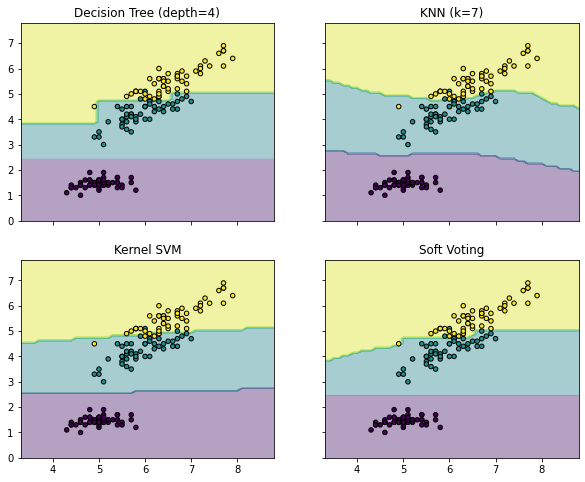

In [4]:
# 畫決策邊界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()